Kaggle competition 1(13.02.2024):-
by Vaishnav Ak

step 1:- problem statement and bussiness cases:-\
use machine learning to create a model that predicts which passengers survived the Titanic shipwreck

step 2:-import libraries

In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

step 3:-Load dataset

In [2]:
data=pd.read_csv('train.csv')

#data=pd.read_csv(r'C:\Users\Vaishnav AK\Documents\KAGGLE\COMP1-TITANIC 13.02)

step 4:-domain analysis

1.pclass: A proxy for socio-economic status (SES)\
1st = Upper\
2nd = Middle\
3rd = Lower\
2.age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
3.sibsp: The dataset defines family relations in this way...\
4.Sibling = brother, sister, stepbrother, stepsister\
5.Spouse = husband, wife  (mistresses and fiancés were ignored) \
6.parch: The dataset defines family relations in this way...\
7.Parent = mother, father\
Child = daughter, son, stepdaughter, stepson\
*Some children travelled only with a nanny, therefore parch=0 for them.
ref:-kaggle (Titanic - Machine Learning from Disaster)



step 5 :-Basic checks\
(head,tail,columns,shape,discribe,info,Dtype,Unique,value_counts)

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data.shape

(891, 12)

In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [14]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [15]:
data['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [16]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [17]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
pd.set_option("display.max_columns",None)
data
              

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
pd.reset_option("display.max_rows",None)
data
              

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
data_short=data[['Survived','Age','Sex']]
data_short

,Survived,Age,Sex
0,0,22.0,male
1,1,38.0,female
2,1,26.0,female
3,1,35.0,female
4,0,35.0,male
...,...,...,...
886,0,27.0,male
887,1,19.0,female
888,0,NaN,female
889,1,26.0,male


In [23]:
data.iloc[15]#random checking

PassengerId                                  16
Survived                                      1
Pclass                                        2
Name           Hewlett, Mrs. (Mary D Kingcome) 
Sex                                      female
Age                                        55.0
SibSp                                         0
Parch                                         0
Ticket                                   248706
Fare                                       16.0
Cabin                                       NaN
Embarked                                      S
Name: 15, dtype: object

In [24]:
data_female=data.loc[data['Sex']=='female']
data_female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [25]:
data_short.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

insights:-
1. Our dataset have some of nan value and object value we should handle it 
2. The number of male is bigger than female
3. The number of survived of female is bigger than the survived of male

step 6 EDA:-\
(3 steps:-univariate,bivariate,multivariate)
#### univariate:
*Hist plot,dist plot,---countinous data \
*count plot          ---discrete and categorical data
#### bivariate: 
   scatterplot,line plot
#### multivariate:``
-pair plot

UNIVARIATE ANALYSIS

In [26]:
#import sweetviz as sv
#report_uni=sv.analyze(data)
#report_uni.show_html()

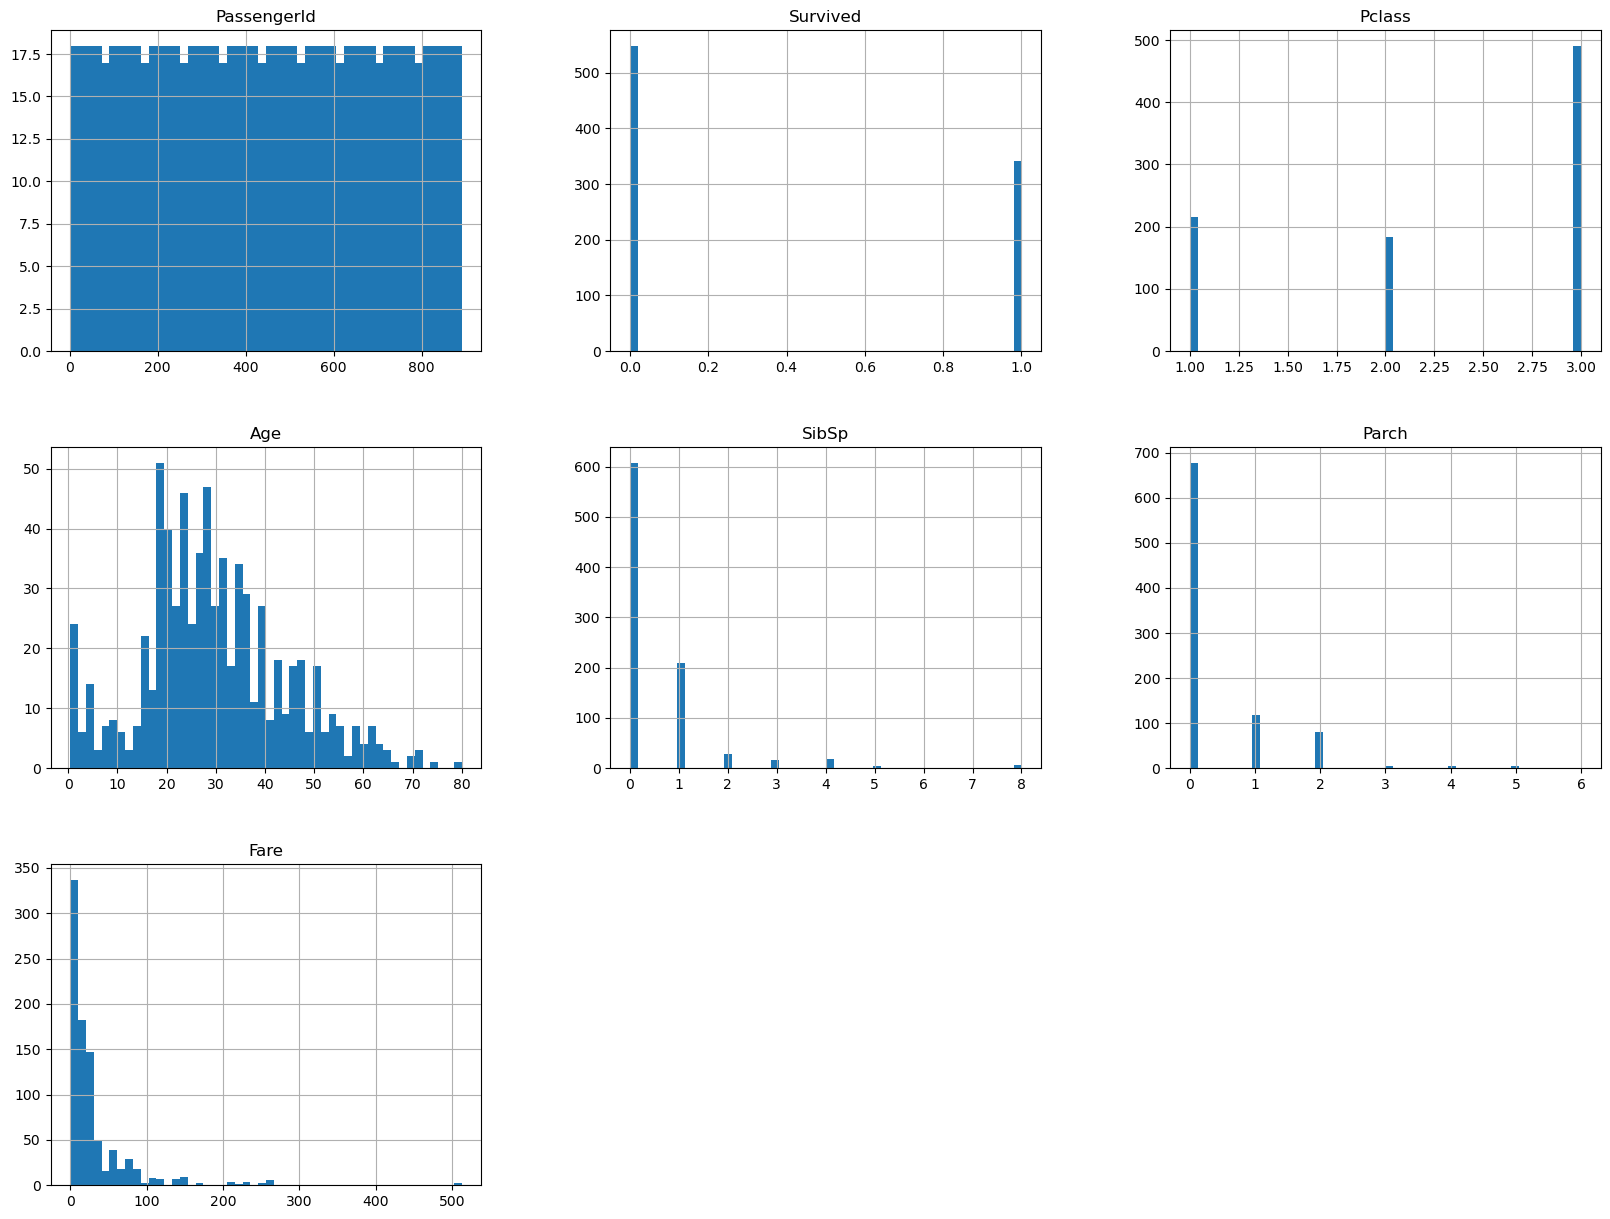

In [27]:
data.hist(bins=50, figsize=(20,15));

In [28]:
box=data.iloc[:,1:]
box

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Bivariate analysis:-

In [29]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [30]:
data_attributes=data[['Pclass', 'Sex', 'SibSp', 'Parch','Embarked']]
data_attributes.head(6)


,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S
5,3,male,0,0,Q


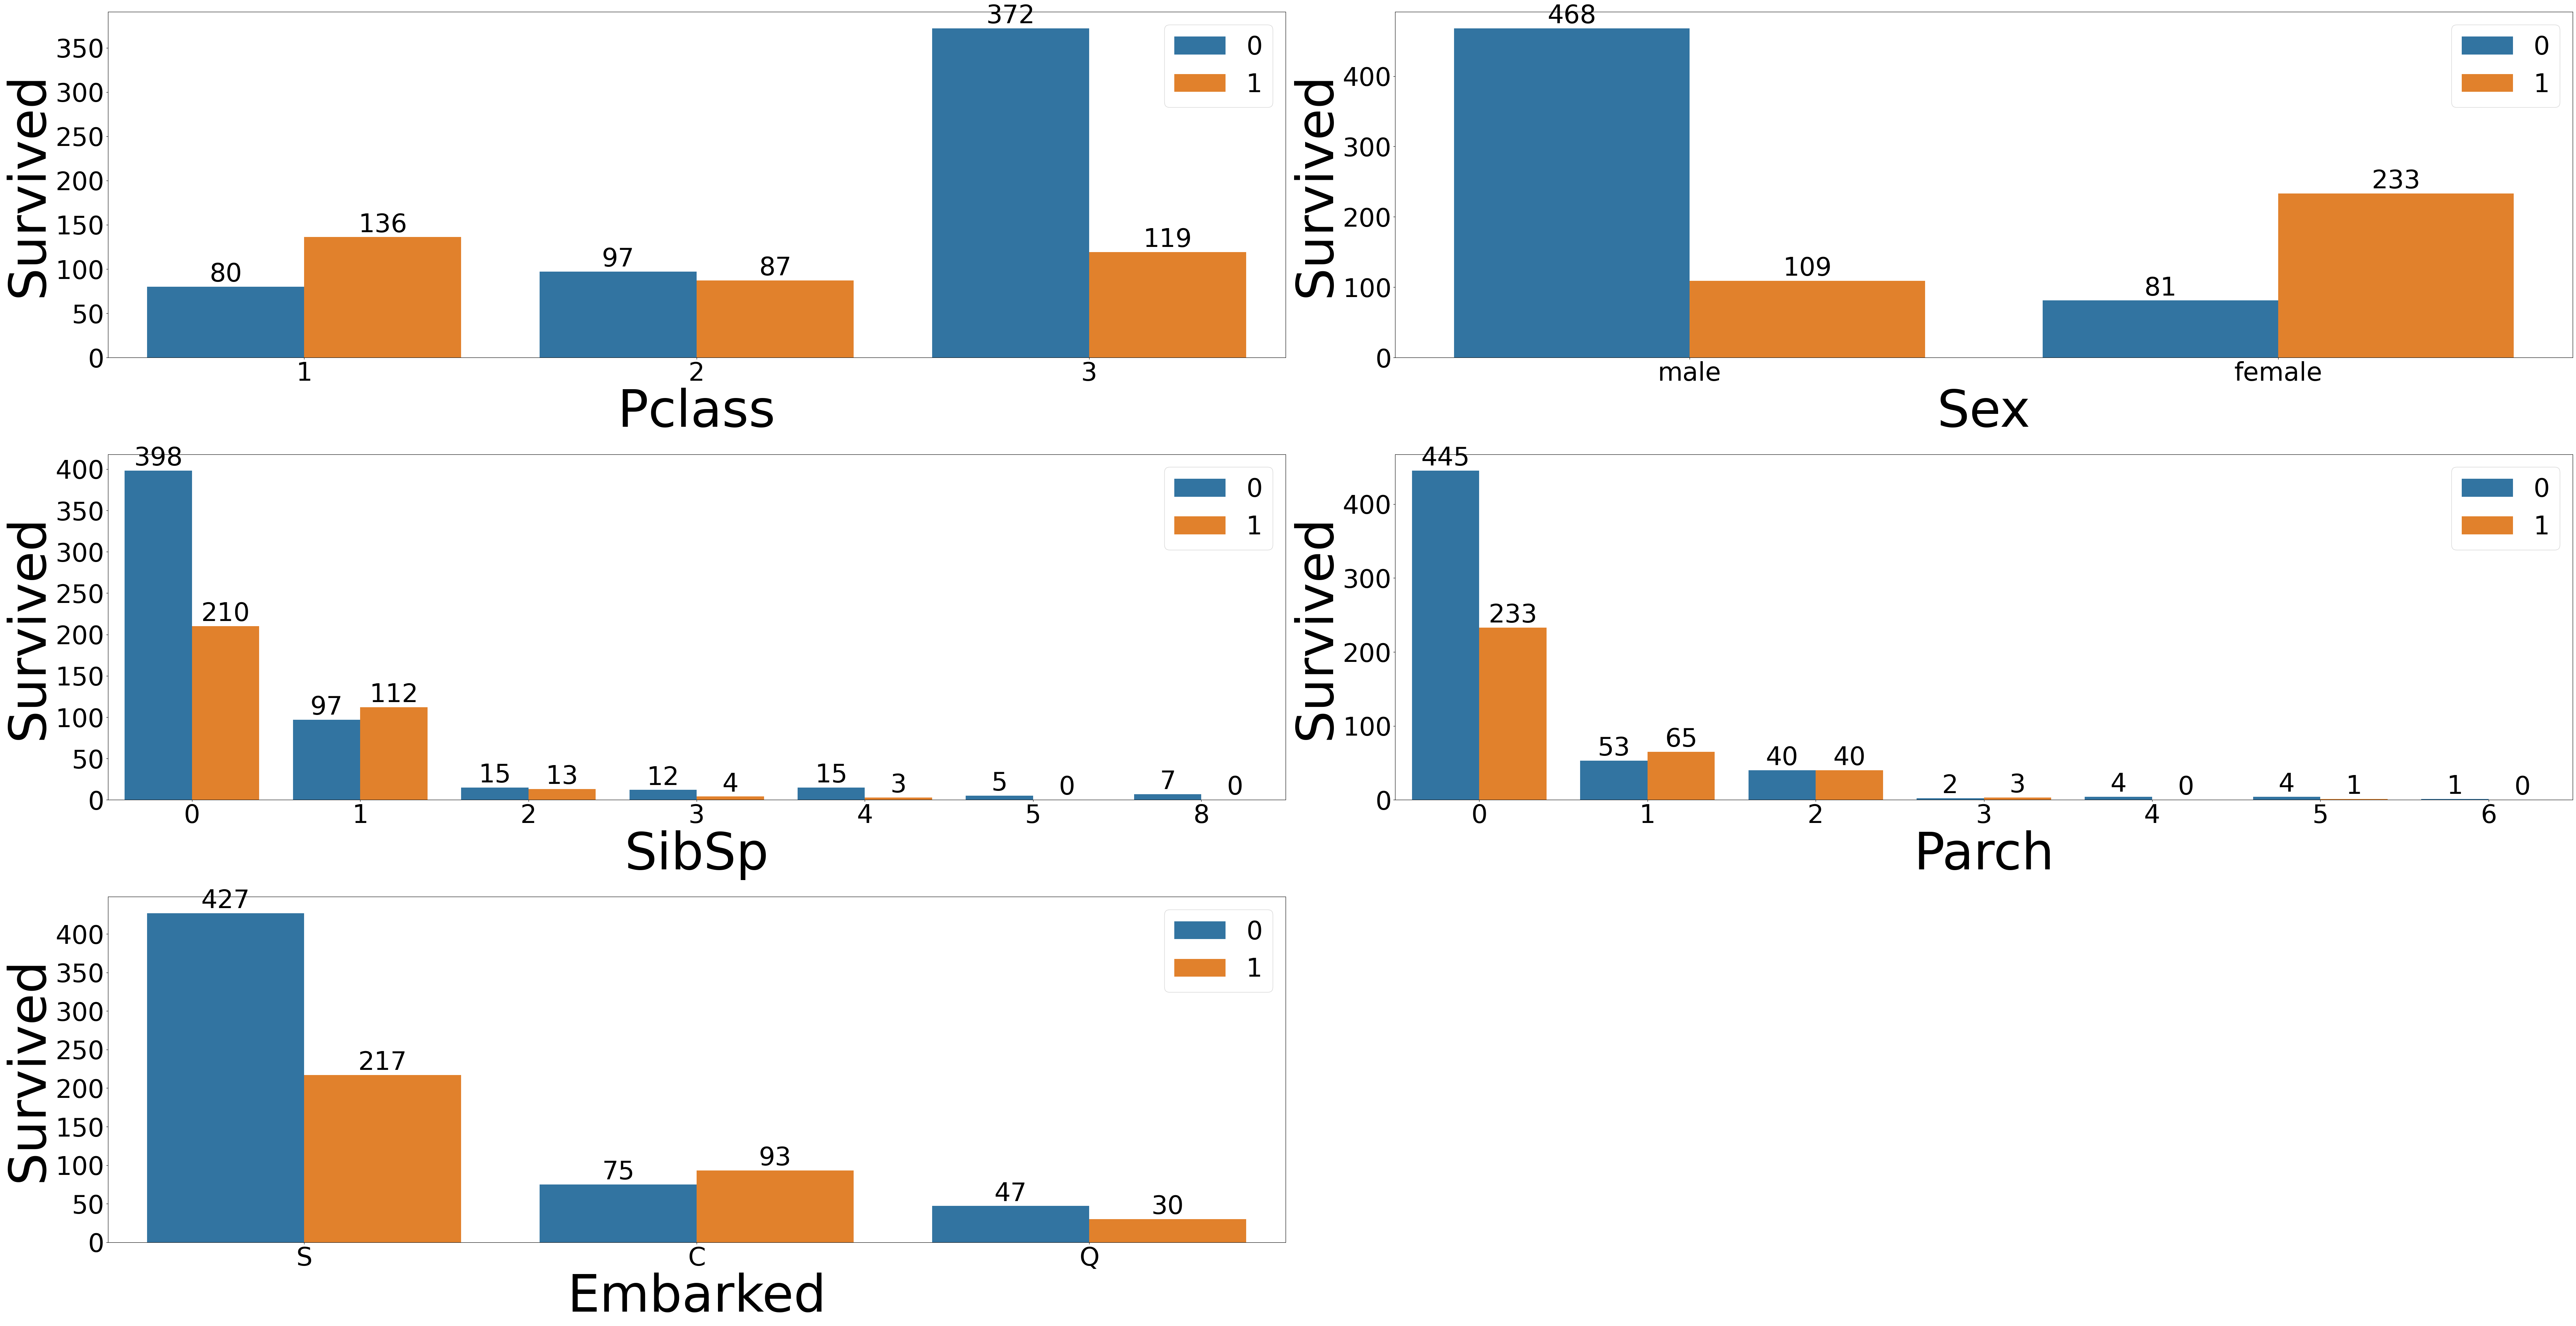

In [31]:
plt.figure(figsize=(70, 70), facecolor="white")
p = 1

for column in data_attributes:
    if p <= 15:
        ax = plt.subplot(6, 2, p)
        sns.countplot(x=data_attributes[column], hue=data["Survived"])
        #sns.scatterplot(x=data_attributes[column], hue=data["Survived"])
       
        plt.xlabel(column, fontsize=100)
        plt.ylabel("Survived", fontsize=100)
        plt.legend(fontsize=50)
        plt.xticks(fontsize=50)
        plt.yticks(fontsize=50)

        # Add values to the countplot
        for rect in ax.patches:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height, f"{int(height)}", ha="center", va="bottom", fontsize=50)

    p += 1

plt.tight_layout()
plt.show()


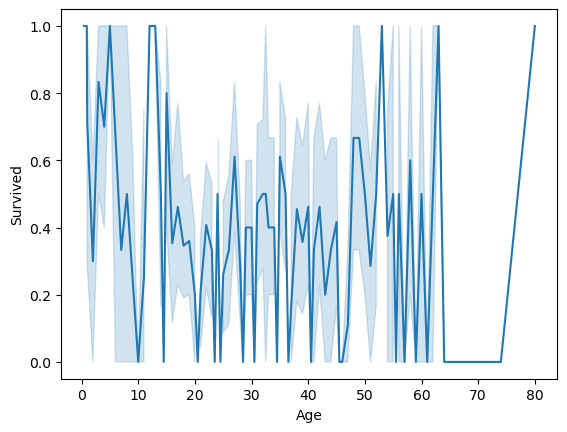

In [32]:
sns.lineplot(x="Age",y="Survived",data=data)
plt.show()


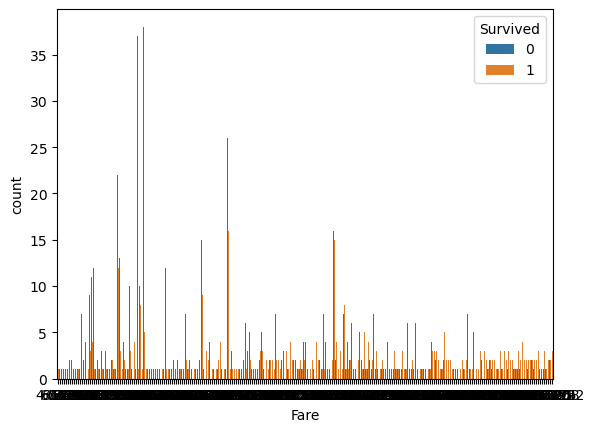

In [33]:
sns.countplot(x=data["Fare"],hue=data["Survived"])
plt.show()

step 6:-Data pre-processing\
    1.find missing values\
    2.checking duplicated values\
    3.checking outliers\
    4.scaling(only in countinues data)\
    5.encoding(categorical--> numerical)

insights:-\
1.here in above data we have to remove the capin column because there are more missing values,and we have to impute the age column\
2.No duplicate values\
3.Age and Fare have outliners

In [34]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
round(100*(data.isnull().sum())/len(data.index),2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [36]:
print(data.duplicated().sum())

0


In [37]:

missing=np.where(data['Age'].isnull()==True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

In [38]:
data.iloc[missing]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [39]:
data.Age.mean()

29.69911764705882

In [40]:
# handle the nan value 
numerical_imputer = SimpleImputer(strategy='median')
data[['Age', 'Fare']] = numerical_imputer.fit_transform(data[['Age', 'Fare']])


In [41]:
#data['Age'].fillna(value=data['Age'].mean(),inplace=True)

In [42]:
data['Age'].isnull().sum()

0

In [43]:
data['Fare'].isnull().sum()

0

In [44]:
data['Embarked'].isnull().sum()

2

In [45]:
# encode our object columns at train dataset
ordinal_encoder=OrdinalEncoder()
data[['Sex', 'Embarked']] = ordinal_encoder.fit_transform(data[['Sex', 'Embarked']] )

In [46]:
data['Embarked'].fillna(value=data['Embarked'].median(),inplace=True)

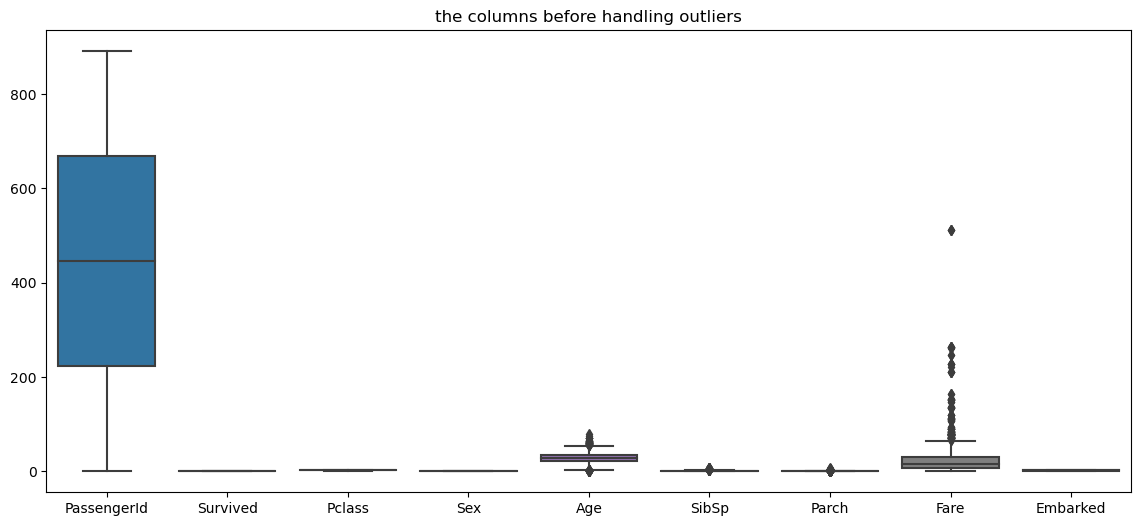

In [47]:
plt.figure(figsize=(14, 6))
sns.boxplot(data)
plt.title("the columns before handling outliers")
plt.show()

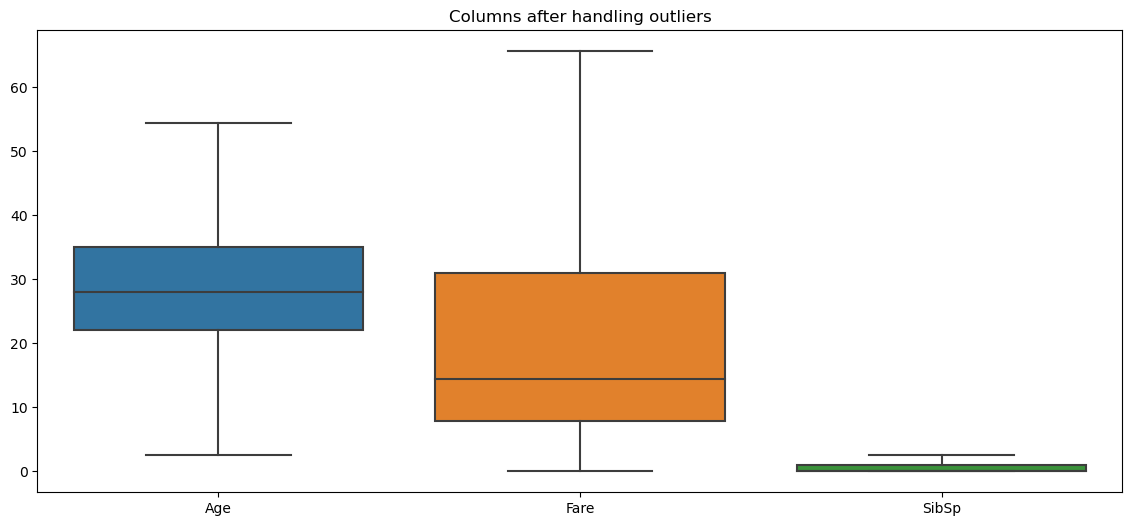

In [48]:
columns_to_handle_outliers = ['Age', 'Fare','SibSp'] 
for col in columns_to_handle_outliers:
    # Calculate IQR and identify potential outliers
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip the values to the lower and upper bounds
    clipped_values = np.clip(data[col], lower_bound, upper_bound)

    # Assign the clipped values back to the DataFrame
    data[col] = clipped_values

# Plot boxplots for the specified columns
plt.figure(figsize=(14, 6))
sns.boxplot(data=data[columns_to_handle_outliers])
plt.title("Columns after handling outliers")
plt.show()

In [49]:
data.sort_values('Pclass',ascending=False,ignore_index=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0,A/5 21171,7.2500,NaN,2.0
1,512,0,3,"Webber, Mr. James",1.0,28.0,0.0,0,SOTON/OQ 3101316,8.0500,NaN,2.0
2,501,0,3,"Calic, Mr. Petar",1.0,17.0,0.0,0,315086,8.6625,NaN,2.0
3,502,0,3,"Canavan, Miss. Mary",0.0,21.0,0.0,0,364846,7.7500,NaN,1.0
4,503,0,3,"O'Sullivan, Miss. Bridget Mary",0.0,28.0,0.0,0,330909,7.6292,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,103,0,1,"White, Mr. Richard Frasar",1.0,21.0,0.0,1,35281,65.6344,D26,2.0
887,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",0.0,24.0,0.0,0,PC 17482,49.5042,C90,0.0
888,712,0,1,"Klaber, Mr. Herman",1.0,28.0,0.0,0,113028,26.5500,C124,2.0
889,713,1,1,"Taylor, Mr. Elmer Zebley",1.0,48.0,1.0,0,19996,52.0000,C126,2.0


In [50]:
data.sort_values(by=['Age','Pclass'],ascending=[1,0])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",1.0,2.5,2.5,1,349909,21.0750,NaN,2.0
16,17,0,3,"Rice, Master. Eugene",1.0,2.5,2.5,1,382652,29.1250,NaN,1.0
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",0.0,2.5,2.5,2,347082,31.2750,NaN,2.0
164,165,0,3,"Panula, Master. Eino Viljami",1.0,2.5,2.5,1,3101295,39.6875,NaN,2.0
172,173,1,3,"Johnson, Miss. Eleanor Ileen",0.0,2.5,1.0,1,347742,11.1333,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
659,660,0,1,"Newell, Mr. Arthur Webster",1.0,54.5,0.0,2,35273,65.6344,D48,0.0
694,695,0,1,"Weir, Col. John",1.0,54.5,0.0,0,113800,26.5500,NaN,2.0
745,746,0,1,"Crosby, Capt. Edward Gifford",1.0,54.5,1.0,1,WE/P 5735,65.6344,B22,2.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0.0,54.5,0.0,0,113572,65.6344,B28,2.0


changing the datatype:-

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(5), int64(4), object(3)
memory usage: 83.7+ KB


In [52]:
data['Age']=data.Age.astype('float16')
data['Fare']=pd.to_numeric(data.Fare,downcast='float')
data['Parch']=pd.to_numeric(data.Parch,downcast='integer')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float16
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    int8   
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float32
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float16(1), float32(1), float64(3), int64(3), int8(1), object(3)
memory usage: 68.9+ KB


In [54]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0,A/5 21171,7.250000,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0,PC 17599,65.634399,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0,STON/O2. 3101282,7.925000,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0,113803,53.099998,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0.0,0,373450,8.050000,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,27.0,0.0,0,211536,13.000000,NaN,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,19.0,0.0,0,112053,30.000000,B42,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,28.0,1.0,2,W./C. 6607,23.450001,NaN,2.0
889,890,1,1,"Behr, Mr. Karl Howell",1.0,26.0,0.0,0,111369,30.000000,C148,0.0


In [55]:
# encode our object columns at train dataset
ordinal_encoder = OrdinalEncoder()
data[[ 'Embarked']] = ordinal_encoder.fit_transform(data[[ 'Embarked']] )
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0,A/5 21171,7.250000,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0,PC 17599,65.634399,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0,STON/O2. 3101282,7.925000,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0,113803,53.099998,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0.0,0,373450,8.050000,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,27.0,0.0,0,211536,13.000000,NaN,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,19.0,0.0,0,112053,30.000000,B42,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,28.0,1.0,2,W./C. 6607,23.450001,NaN,2.0
889,890,1,1,"Behr, Mr. Karl Howell",1.0,26.0,0.0,0,111369,30.000000,C148,0.0


In [56]:
data.Embarked.isnull().sum()

0

step 7:-Feature Engineering\
    1.Removing irrelavant columns\
    2.checking correlation

In [57]:
data.drop(columns = ["Cabin","PassengerId", "Ticket", "Name"],inplace = True)

In [58]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1.0,0,7.250000,2.0
1,1,1,0.0,38.0,1.0,0,65.634399,0.0
2,1,3,0.0,26.0,0.0,0,7.925000,2.0
3,1,1,0.0,35.0,1.0,0,53.099998,2.0
4,0,3,1.0,35.0,0.0,0,8.050000,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0.0,0,13.000000,2.0
887,1,1,0.0,19.0,0.0,0,30.000000,2.0
888,0,3,0.0,28.0,1.0,2,23.450001,2.0
889,1,1,1.0,26.0,0.0,0,30.000000,0.0


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float16
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    int8   
 6   Fare      891 non-null    float32
 7   Embarked  891 non-null    float64
dtypes: float16(1), float32(1), float64(3), int64(2), int8(1)
memory usage: 41.0 KB


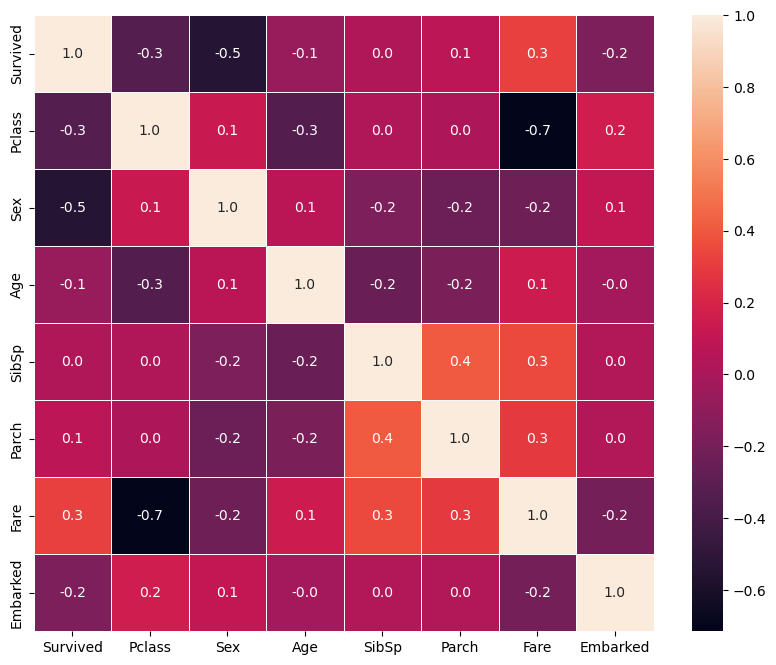

In [60]:
#correlation map
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

Step 8:- Model creation\
    1.Define X and Y\
    2.Split into training and testing\
    3.Model selection[Select suitable Algorithm]

In [61]:
X = data.drop(columns = ["Survived"],axis = 1)
y = data["Survived"]

In [62]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [63]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float16
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    int8   
 6   Fare      891 non-null    float32
 7   Embarked  891 non-null    float64
dtypes: float16(1), float32(1), float64(3), int64(2), int8(1)
memory usage: 41.0 KB


step 9:-Model creation\
    1.Regression Problem :MSE,MAE,RMSE,R2_SCORE(R2 SCORE is focusing more)\
    2.Classification problem:-Confusion_metrics,Accuracy,Precision,recall,F1_score,classification report\
        (accuracy is focusing more)
        3 Binary:-ROC,AUC

In [65]:
# Best hyperparameters for XGBoost
best_xgboost_params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

# List of classifiers to try
classifiers = {
    #"Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features='sqrt'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    "SVM": SVC(C=1.0, kernel='rbf', gamma='scale'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gaussian Naive Bayes": GaussianNB(),
    "MLPClassifier": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', alpha=0.0001),
    "XGBoost": XGBClassifier(objective='binary:logistic', random_state=42, **best_xgboost_params)
}

# List to store accuracy dataframes
accuracy_dfs = []

# Train, predict, and evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Predict on the training set
    predictions_train = clf.predict(X_train)

    # Evaluate the training accuracy
    accuracy_train = accuracy_score(y_train, predictions_train)

    # Predict on the test set
    predictions_test = clf.predict(X_test)

    # Evaluate the testing accuracy
    accuracy_test = accuracy_score(y_test, predictions_test)

    # Create a DataFrame for the current classifier
    accuracy_df = pd.DataFrame({
        "Classifier": [clf_name],
        "Training Accuracy": [accuracy_train],
        "Testing Accuracy": [accuracy_test]
    })

    # Append the DataFrame to the list
    accuracy_dfs.append(accuracy_df)

# Concatenate all DataFrames into a single DataFrame
final_accuracy_df = pd.concat(accuracy_dfs, ignore_index=True)

# Display the final accuracy DataFrame
print(final_accuracy_df)

             Classifier  Training Accuracy  Testing Accuracy
0         Decision Tree           0.839888          0.821229
1         Random Forest           0.846910          0.832402
2     Gradient Boosting           0.908708          0.843575
3                   SVM           0.837079          0.821229
4   K-Nearest Neighbors           0.858146          0.826816
5  Gaussian Naive Bayes           0.761236          0.776536
6         MLPClassifier           0.845506          0.815642
7               XGBoost           0.922753          0.854749


D:\App_data\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
data_test=pd.read_csv('test.csv')
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [67]:
test = data_test.copy()
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [68]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
data_test.duplicated().sum()

0

In [70]:
data_test.drop(columns = ["Cabin","PassengerId", "Ticket", "Name"],inplace = True)

In [71]:
# encode our object columns at train dataset
ordinal_encoder = OrdinalEncoder()
data_test[['Sex', 'Embarked']] = ordinal_encoder.fit_transform(data_test[['Sex', 'Embarked']] )

In [72]:
# handle the nan value 
numerical_imputer = SimpleImputer(strategy='median')
data_test[['Age', 'Fare']] = numerical_imputer.fit_transform(data_test[['Age', 'Fare']])


In [73]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    float64
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 23.0 KB


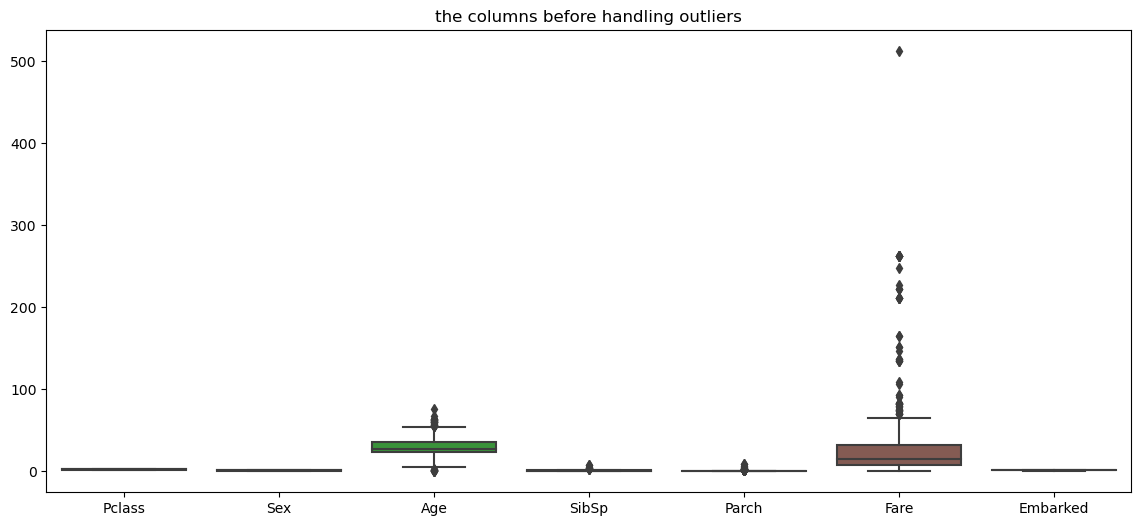

In [74]:
plt.figure(figsize=(14, 6))
sns.boxplot(data_test)
plt.title("the columns before handling outliers")
plt.show()

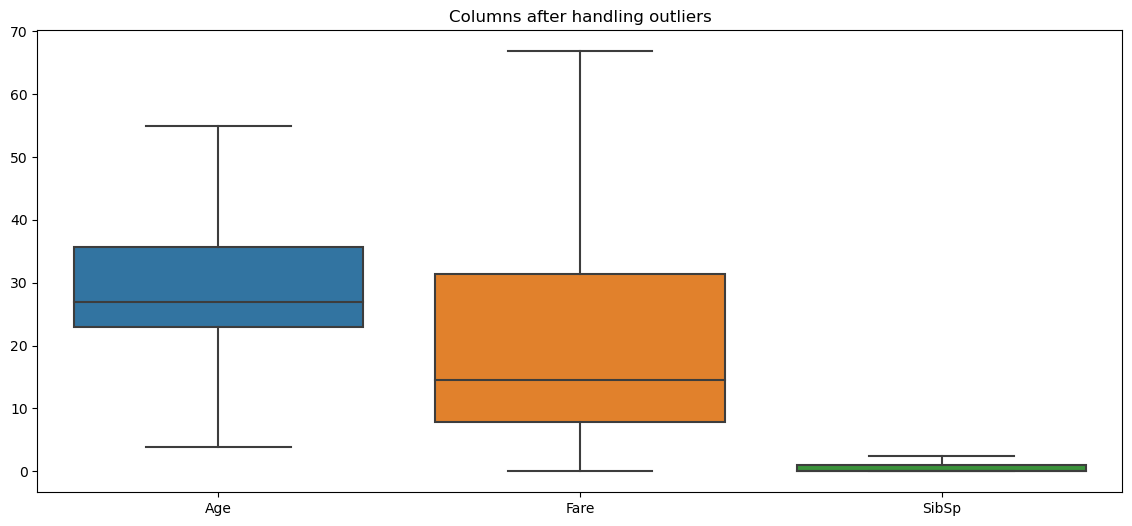

In [75]:
columns_to_handle_outliers = ['Age', 'Fare','SibSp'] 
for col in columns_to_handle_outliers:
    # Calculate IQR and identify potential outliers
    Q1 = data_test[col].quantile(0.25)
    Q3 = data_test[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip the values to the lower and upper bounds
    clipped_values = np.clip(data_test[col], lower_bound, upper_bound)

    # Assign the clipped values back to the DataFrame
    data_test[col] = clipped_values

# Plot boxplots for the specified columns
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_test[columns_to_handle_outliers])
plt.title("Columns after handling outliers")
plt.show()

In [76]:
best_xgboost_params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
# Fit the Random Forest model
best_model = XGBClassifier()
best_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_model.predict(data_test)

# Create a submission DataFrame
submission_df = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})

# Save the submission to a CSV file
submission_df.to_csv('Titanic_submission.csv', index=False)

print("Submission file created successfully.")
submission_df

Submission file created successfully.


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [77]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    float64
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    float64
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 23.0 KB


In [78]:
submission_df.Survived.value_counts()

0    342
1     76
Name: Survived, dtype: int64